# Lesson 01. Part 4. Universal linear equation

Let's try to build a universal linear equation: ```y = kx + b```. The thing is that we don't need to train a neaural network for this. It's much easier to achieve it with a simple math. How can we do this?

```k``` parameter in the equation is a slope or how the difference in change in ```y``` relates to the change in difference of ```x```. Between 2 points, the formula is: ```k = (y1-y2)/(x1-x2)```. If we have more than 1 point, then the result ```k(result)``` is the average value of all ```k(i)```.

We can simplify this formula and count slopes between 2 nearest points, then calculate its average value:

```k = ((y1-y2)/(x1-x2) + (y2-y3)/(x2-x3) + ... (y(n-1)-y(n))/(x(n-1)-x(n))) / N ```

Let's try how it works

## Preparation

In [465]:
import torch
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [466]:
# get device for training (cpu, cuda or mps)
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"{device} device is used")

mps device is used


In [467]:
# display settings
torch.set_printoptions(precision=2, sci_mode=False)

## Sample data

The input for our model will be a set of ```(x,y)``` points. As a result, it needs to calculate and return ```k``` and ```b``` values from the equation ```y = kx + b```

Let's create some helper-functions to generate sample data

In [468]:
# let's create a function to calculate y for the equation y = kx + b
def calculate_y(x, k, b, bias):
    y = k * x + b + bias * random.random()
    return y

def generate_random_value(min_value, max_value):
    return random.random() * (max_value - min_value) + min_value

def generate_linear_values(x_min, x_max, amount, k, b, bias=0):
    x = torch.rand(amount) * (x_max - x_min) + x_min
    y = x.clone().apply_(lambda x: calculate_y(x=x, k=k, b=b, bias=bias))
    return (x,y)

Let's check how functions above work

k =  -7.086614897917394
b =  -0.9014599097195735
x =  tensor([-7.77,  6.32, -4.75, -0.32,  3.53,  5.08, -4.75, -9.14, -5.84, -7.64,
        -7.57,  4.71,  4.24,  5.75, -1.63,  8.03])
y =  tensor([ 54.14, -45.67,  32.75,   1.38, -25.92, -36.89,  32.73,  63.89,  40.48,
         53.23,  52.72, -34.29, -30.92, -41.66,  10.68, -57.79])


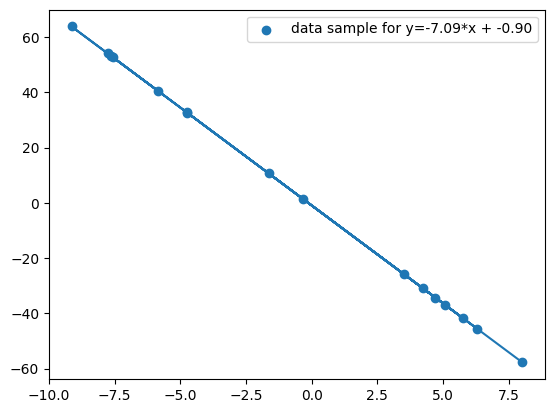

In [469]:
# settings
model_input_points = 16

min_x = -10
max_x = 10

min_k = -10
max_k = 10

min_b = -10
max_b = 10

# generation
random.seed(100)         # fix random values (debug only)
torch.manual_seed(100)   # fix random values (debug only)

k = generate_random_value(min_k, max_k)
b = generate_random_value(min_b, max_b)

(x,y) = generate_linear_values(
    x_min=min_x,
    x_max=max_x,
    amount=model_input_points,
    k=k,
    b=b,
)

print('k = ', k)
print('b = ', b)
print('x = ', x)
print('y = ', y)

plt.plot(x, y)
plt.scatter(x, y, label='data sample for y={:.2f}*x + {:.2f}'.format(k, b))
plt.legend()
plt.show()

## Let's do some math

At this point of time we have a list of points. Let's try to calculate the slope ```k``` and and shift ```b``` based on these points

In [470]:
def calculate_slope(x,y):
    x_difference = x - torch.full((1, len(x)), x[0].item())
    y_difference = y - torch.full((1, len(y)), y[0].item())

    slopes = y_difference / x_difference
    calculated_k = torch.nanmean(slopes)

    return calculated_k

calculated_k = calculate_slope(x,y)
print('calculated_k = ', calculated_k)

calculated_k =  tensor(-7.09)


Knowing ```k``` we can easily calculate ```b``` using formula ```b = y - kx```

In [471]:
def calculate_shift(x,y,k):
    b_values = y - torch.full((1, len(x)), k.item()) * x
    calculated_b = torch.mean(b_values)

    return calculated_b

calculated_b = calculate_shift(x,y,calculated_k)
print('calculated_b = ', calculated_b)

calculated_b =  tensor(-0.90)


It can be seen that both ```k``` and ```b``` values are calculated properly using only math. The total function to calculate this values will be:

In [472]:
def calculate_linear_params(x,y):
    k = calculate_slope(x,y)
    b = calculate_shift(x,y,k)

    return (k,b)

In [473]:
calculate_linear_params(x,y)

(tensor(-7.09), tensor(-0.90))

## Let's apply this function for other datasets

calculated (k,b) (tensor(1.88), tensor(-0.60))


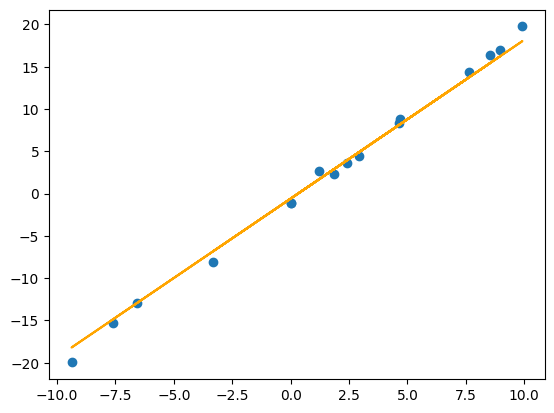

In [474]:
random.seed(200)         # fix random values (debug only)
torch.manual_seed(200)   # fix random values (debug only)

(test_x, test_y) = generate_linear_values(
    x_min=min_x,
    x_max=max_x,
    amount=model_input_points,
    k=2,
    b=-1.5,
    bias=2
)

(result_k, result_b) = calculate_linear_params(test_x, test_y)
print('calculated (k,b)', (result_k, result_b))

plt.plot(
    test_x,
    test_x.clone().apply_(lambda x: result_k * x + result_b),
    color='orange'
)
plt.scatter(test_x, test_y)
plt.show()

Everything works!!!